<a href="https://colab.research.google.com/github/Anoognyareddy06/NLP-Assignments/blob/main/2403A52244_NLP_Ass_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 23.3 MB/s eta 0:00:00


In [2]:
# ================================
# Loading Pre-trained Embeddings
# ================================
from gensim.models import KeyedVectors
import gensim.downloader as api

# ================================
# Handling Matrices & Numerical Operations
# ================================
import numpy as np

# ================================
# Visualization
# ================================
import matplotlib.pyplot as plt

# ================================
# t-SNE for Dimensionality Reduction
# ================================
from sklearn.manifold import TSNE

In [3]:
# Load pre-trained Word2Vec model (may take time on first download)
model_word2vec = api.load("word2vec-google-news-300")
model_glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
[==================================================] 100.0% 128.1/128.1MB downloaded


In [4]:
word_list = [

    # Fantasy & Magic
    "wizard", "dragon", "spell", "castle", "sword",

    # Travel & Geography
    "airport", "hotel", "beach", "desert", "island",

    # Drinks
    "water", "juice", "milk", "wine", "beer",

    # Technology (devices)
    "smartphone", "tablet", "camera", "drone", "television",

    # Jobs
    "teacher", "doctor", "engineer", "musician", "athlete",

    # Shapes
    "circle", "square", "triangle", "rectangle", "hexagon",

    # Seasons
    "spring", "summer", "autumn", "winter", "monsoon",

    # Literature
    "novel", "poem", "story", "author", "library"
]

In [5]:
vectors = [model_word2vec[word] for word in word_list if word in model_word2vec]

# Convert to NumPy array
vectors_word2vec = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_word2vec.shape)
print(vectors_word2vec[0])

Total selected words: 40
Vector shape: (40, 300)
[ 0.31054688  0.11523438 -0.21191406 -0.05541992  0.16308594  0.4609375
 -0.27539062 -0.07617188  0.01153564 -0.125       0.16503906 -0.17578125
  0.11279297 -0.36132812 -0.01318359  0.1796875   0.33203125 -0.09521484
 -0.02770996 -0.25976562 -0.02734375  0.38085938  0.1328125   0.26953125
  0.20214844 -0.01904297  0.03515625  0.02490234 -0.06494141 -0.11230469
  0.140625   -0.07763672 -0.18359375  0.2734375  -0.02331543  0.12060547
 -0.07128906 -0.1328125   0.203125    0.07324219  0.19042969 -0.26953125
  0.38476562  0.14355469  0.08642578 -0.29882812 -0.06152344 -0.21289062
  0.10888672 -0.07128906 -0.55078125  0.37695312  0.03564453 -0.14648438
 -0.19921875 -0.02319336  0.06689453 -0.31445312 -0.41796875 -0.06933594
 -0.125       0.01782227  0.10839844 -0.3125      0.15527344 -0.00524902
 -0.15039062 -0.25585938 -0.10205078  0.03613281  0.21875     0.09033203
 -0.16992188 -0.21484375 -0.01281738  0.03881836  0.046875    0.08496094
 -0

In [6]:
vectors = [model_glove[word] for word in word_list if word in model_glove]

# Convert to NumPy array
vectors_glove = np.array(vectors)

print("Total selected words:", len(word_list))
print("Vector shape:", vectors_glove.shape)
print(vectors_glove[0])

Total selected words: 40
Vector shape: (40, 100)
[ 0.30943   -0.027142   0.57865   -0.66131   -0.37233    0.40766
 -0.28125    0.19348   -0.63497   -0.15076    0.51541   -0.29725
 -0.44139   -0.18555   -0.050061   0.23124    0.72155    0.48756
 -0.11408    0.27156   -0.11943   -0.59162   -0.41341   -0.58532
  0.72202    0.57366   -0.045198  -0.10238   -0.73343    0.17508
  0.19473    0.20816   -0.71834   -0.498     -0.28099    0.068696
 -0.45862   -0.085602   0.61675   -0.67167   -0.4965     0.9813
  0.049607  -0.33754    0.3795     0.013658  -0.24706    0.27496
  1.0845     0.31973   -0.61015    0.4988     0.80413    0.6645
  0.38931   -1.1298    -0.64792    0.81243   -0.25604    0.24574
  0.33378    0.6617    -0.60108    0.48613   -0.055998  -0.12294
  0.66535    0.083019   0.34038   -0.046341   0.21789   -0.40441
 -0.6909     0.23113   -0.71145    0.43484    0.29558    0.061657
  0.40441   -0.46717    0.31722    0.24555   -0.27227    0.0086042
 -0.80633    1.0741    -0.28451   -0.53

In [7]:
# Assume vectors already extracted from previous step
# vectors shape example: (40, 100)

# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_word2vec)

# Store results
print("Original Shape:", vectors_word2vec.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of word2vec
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_word2vec[:5])

Original Shape: (40, 300)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 406.9382    163.92743 ]
 [ 428.44922   247.69997 ]
 [-186.17693   -73.185356]
 [ 313.06268   289.9638  ]
 [ 452.91916   308.70734 ]]

First 5 t-SNE Coordinates:
[[ 0.31054688  0.11523438 -0.21191406 ... -0.08105469 -0.16210938
   0.15625   ]
 [ 0.171875    0.17089844 -0.0612793  ...  0.22460938 -0.13574219
   0.09277344]
 [ 0.10302734  0.06738281 -0.16894531 ...  0.10009766  0.15722656
   0.08007812]
 [ 0.14648438  0.13671875 -0.12255859 ...  0.11181641  0.22753906
   0.08496094]
 [ 0.51953125  0.1875      0.31445312 ... -0.03344727 -0.2734375
   0.28125   ]]


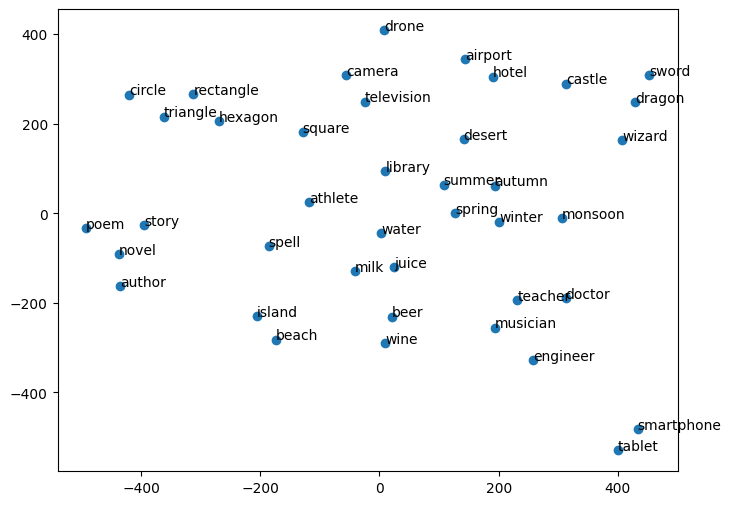

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()

In [9]:
# Assume vectors already extracted from previous step
# vectors shape example: (40, 100)

# Apply t-SNE
tsne = TSNE(
    n_components=2,      # Reduce to 2D
    random_state=42,
    perplexity=10,
    learning_rate=200
)

tsne_coordinates = tsne.fit_transform(vectors_glove)

# Store results
print("Original Shape:", vectors_glove.shape)
print("Reduced Shape:", tsne_coordinates.shape)

# Display first 5 coordinates
print("\nFirst 5 t-SNE Coordinates:")
print(tsne_coordinates[:5])
# Display first 5 coordinates of glove
print("\nFirst 5 t-SNE Coordinates:")
print(vectors_glove[:5])

Original Shape: (40, 100)
Reduced Shape: (40, 2)

First 5 t-SNE Coordinates:
[[ 2.1048557e+01  1.5957761e+01]
 [ 1.1501329e-01  9.0890808e+00]
 [ 3.0839739e+01  4.9373711e+01]
 [-1.2473510e+02 -5.2446327e+01]
 [-1.0287462e+00 -8.4847469e+00]]

First 5 t-SNE Coordinates:
[[ 3.0943e-01 -2.7142e-02  5.7865e-01 -6.6131e-01 -3.7233e-01  4.0766e-01
  -2.8125e-01  1.9348e-01 -6.3497e-01 -1.5076e-01  5.1541e-01 -2.9725e-01
  -4.4139e-01 -1.8555e-01 -5.0061e-02  2.3124e-01  7.2155e-01  4.8756e-01
  -1.1408e-01  2.7156e-01 -1.1943e-01 -5.9162e-01 -4.1341e-01 -5.8532e-01
   7.2202e-01  5.7366e-01 -4.5198e-02 -1.0238e-01 -7.3343e-01  1.7508e-01
   1.9473e-01  2.0816e-01 -7.1834e-01 -4.9800e-01 -2.8099e-01  6.8696e-02
  -4.5862e-01 -8.5602e-02  6.1675e-01 -6.7167e-01 -4.9650e-01  9.8130e-01
   4.9607e-02 -3.3754e-01  3.7950e-01  1.3658e-02 -2.4706e-01  2.7496e-01
   1.0845e+00  3.1973e-01 -6.1015e-01  4.9880e-01  8.0413e-01  6.6450e-01
   3.8931e-01 -1.1298e+00 -6.4792e-01  8.1243e-01 -2.5604e-01  

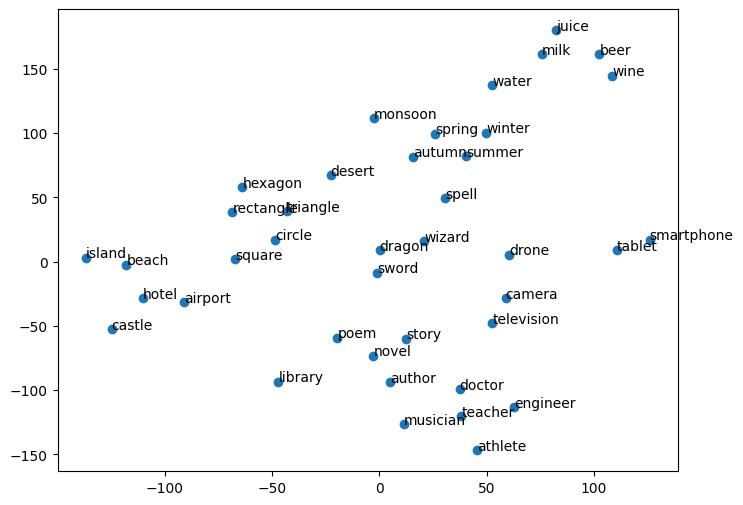

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_coordinates[:,0], tsne_coordinates[:,1])

for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_coordinates[i,0], tsne_coordinates[i,1]))

plt.show()